# <center>Transaction History Analyser</center>

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import re

### Parse Data and Form DataFrame

In [107]:
with open('data/My Activity.html', 'r') as file:
    html_data = file.read()

df = pd.DataFrame(columns=['Date', 'Amount', 'Type', 'To'])
soup = BeautifulSoup(html_data, 'html.parser')

mydivs = soup.find_all('div', class_='content-cell mdl-cell mdl-cell--6-col mdl-typography--body-1')
for div in mydivs:
    transaction_text = div.get_text(strip=True)
    transaction_text = re.sub(' +', ' ', transaction_text.replace('\n', ''))
    transaction_text_split = transaction_text.split(' ')
    if transaction_text_split[0] == 'Received':
        type = 'credit'
        amount = re.search(r'₹([\d.]+)', transaction_text).group(1)
        to = None
    else:
        type = 'debit'
        amount = re.search(r'₹([\d.]+)', transaction_text).group(1)
        to = transaction_text.split(' to ')[1].split('using')[0] if 'to' in transaction_text else None
    date = re.search(r'\w{3} \d{1,2}, \d{4}, \d{1,2}:\d{2}:\d{2}\s?[AP]M', transaction_text).group()
    new_row = pd.DataFrame([{'Date': pd.to_datetime(date), 'Amount': float(amount), 'Type': type, 'To': to}])
    df = pd.concat([df, new_row]) 

In [108]:
df.head()

,Date,Amount,Type,To
0,2023-07-12 17:43:33,97.0,credit,None
0,2023-07-12 17:19:51,97.0,debit,Health And Beauty Wellness
0,2023-07-05 13:16:49,980.0,debit,SBIMOPS
0,2023-07-03 19:07:30,344.0,debit,None
0,2023-07-03 10:23:59,668.0,credit,None


### Monthly Expenditure

<AxesSubplot:title={'center':'Credit per month'}, xlabel='Date'>

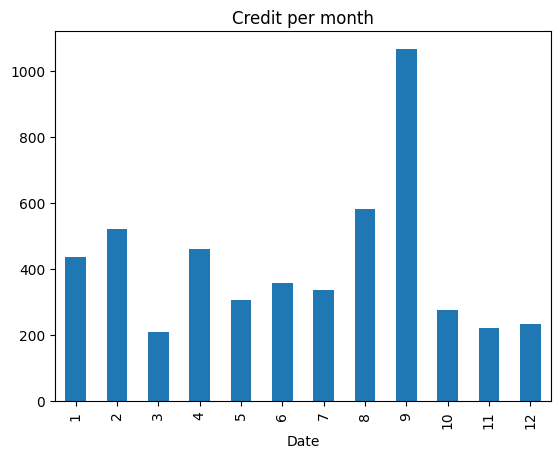

In [113]:
credit_rows = df[df['Type'] == 'credit']
credit_rows.groupby(credit_rows['Date'].dt.month)['Amount'].mean().plot(kind='bar', title='Credit per month')

<AxesSubplot:title={'center':'Average debit per month'}, xlabel='Date'>

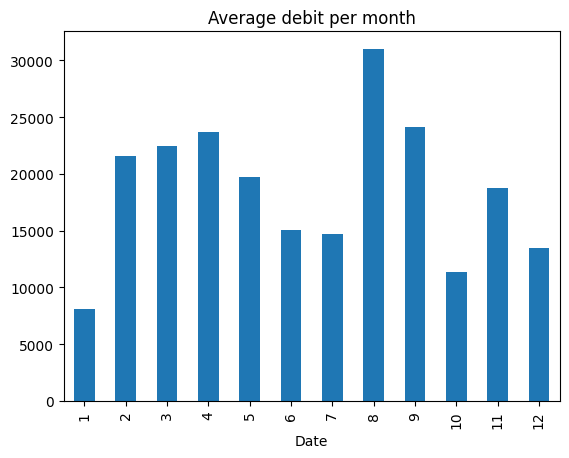

In [117]:
debit_rows = df[df['Type'] == 'debit']
# plot the average amount debited per month
debit_rows.groupby(debit_rows['Date'].dt.month)['Amount'].sum().plot(kind='bar', title='Average debit per month')

<AxesSubplot:title={'center':'Debit - Credit per month'}, xlabel='Date'>

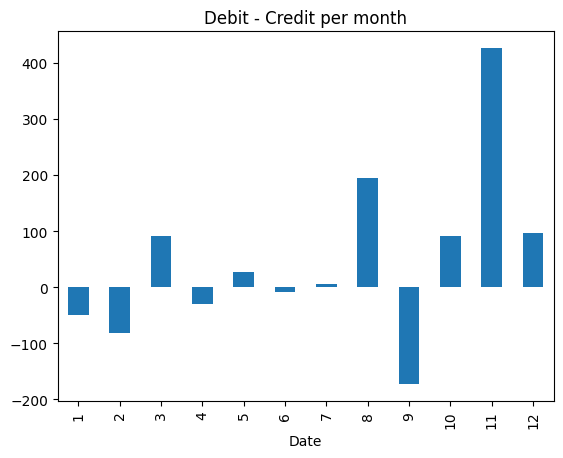

In [116]:
# plot credit-debit per month
credit_debit = debit_rows.groupby(debit_rows['Date'].dt.month)['Amount'].mean() - credit_rows.groupby(credit_rows['Date'].dt.month)['Amount'].mean()
credit_debit.plot(kind='bar', title='Debit - Credit per month')